**Note**: Work with reduced datasets for the exercise tasks, that is the datasets in the EUR-11N folder.

The solutions are available in the same folder, check them if you get stuck but try to find a solution on your own first.

# Task 1

To do this task, in your home directory select this file `/lhome/cra2022/YOURHOME/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tas/reduced_tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc`. 

Find out the following:

a) Data variables (how many? what are their names?)

b) Coordinates and dimensions of the file. Are coordinates and dimensions the same?

c) Max/Min of the following: time, latitude, longitude

d) Unit of the variable

e) Extract the grid points located close to Bern. (Hint: Use `method='nearest'`)

f) Visualise the time-series for Bern using a quick plot.

In [27]:
import cartopy.crs as ccrs # for geographic plotting
import cartopy.feature as cfeature
from IPython.display import Image
import xarray as xr
import xclim as xc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xclim as xc
import xarray as xr

# insert a new cell and enter your solution
#!pwd
input_file = '/lhome/cra2022/l.quirino.2_2022/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tas/reduced_tas_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc'
#input_file

datos = xr.open_dataset(input_file)

datos

# a) time_bnds, tas

# b) dimensions: Eg, lat, lon, time
#    coordinates: labels of each point in the form of a Python-dictionary

# c) Time: 1 to 1826 steps ('1971-01-01T12:00:00.000000000', ..., '1975-12-31T12:00:00.000000000')
#    Lon: 5. to 11.
#    Lat: 44 to 48 N

# d) Long_name: Near-Surface Air Temperature
#    Units: K

<xarray.Dataset>
Dimensions:    (time: 1826, bnds: 2, lon: 61, lat: 41)
Coordinates:
  * time       (time) datetime64[ns] 1971-01-01T12:00:00 ... 1975-12-31T12:00:00
  * lon        (lon) float64 5.0 5.1 5.2 5.3 5.4 ... 10.6 10.7 10.8 10.9 11.0
  * lat        (lat) float64 44.0 44.1 44.2 44.3 44.4 ... 47.7 47.8 47.9 48.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/31)
    CDI:                            Climate Data Interface version ?? (http:/...
    history:                        Fri Mar 13 11:20:15 2020: cdo sellonlatbo...
    source:                         MPI-CSC-REMO2009
    institution:                    Helmholtz-Zentrum Geesthacht, Climate Ser...
    Conventions:                    CF-1.4
    institute_id:                   MPI-CSC
    ...                             ...
    table_id:                       Table day (March 2015) 6f55fe4ad23cded422...
    title:                          MPI-CSC-REMO2009 model output prepared fo...
    modeling_realm:                 atmos
    realization:                    1
    cmor_version:                   2.9.1
    CDO:                            Climate Data Operators version 1.9.3 (htt...

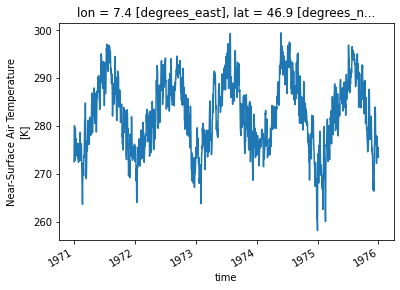

In [2]:
# e)

# quick time series plot for Bern
bern = datos.tas.sel(lat=46.9, lon=7.4, method='nearest')#.plot();

# f) 

bern.plot()

# Task 2

a)	Select the years 1971, 1972-1974 from the file you used in task 1.

b)	Select the `autumn (SON)` months for the years 1971-1975 (Hint: do it in two steps using a mask). 

c)	Calculate `mean climatology` for the data selected in b)

d) Calculate anomalies for autumn months in 1973 with respect to climatological mean (1971-1975) and visualize it with a quick plot


In [3]:
# a) 

temp71 = datos.tas.sel(time=slice('1971-01-01', '1971-12-31' ))

temp71

temp72_75 = datos.tas.sel(time=slice('1972-01-01', '1975-12-31' ))

temp72_75

<xarray.DataArray 'tas' (time: 1461, lat: 41, lon: 61)>
[3653961 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1972-01-01T12:00:00 ... 1975-12-31T12:00:00
  * lon      (lon) float64 5.0 5.1 5.2 5.3 5.4 5.5 ... 10.6 10.7 10.8 10.9 11.0
  * lat      (lat) float64 44.0 44.1 44.2 44.3 44.4 ... 47.6 47.7 47.8 47.9 48.0
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    comment:           daily-mean near-surface (usually, 2 meter) air tempera...
    cell_methods:      time: mean
    history:           2016-02-01T11:13:29Z altered by CMOR: Treated scalar d...
    associated_files:  gridspecFile: gridspec_atmos_fx_MPI-CSC-REMO2009_histo...

(array([3.50000e+01, 5.16000e+02, 3.92000e+03, 1.91070e+04, 8.66750e+04,
        2.45783e+05, 3.97229e+05, 2.77680e+05, 9.94680e+04, 7.54200e+03]),
 array([241.98347, 248.1601 , 254.3367 , 260.5133 , 266.68994, 272.86655,
        279.04315, 285.21976, 291.39636, 297.573  , 303.7496 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

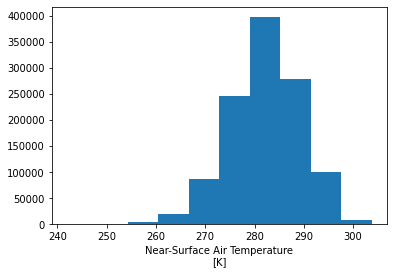

In [4]:
# b) 

time_mask_autumn = datos.time.dt.month.isin([9,10,11]) # isin selects timestamps that belong to months 9, 10 and 11

time_mask_autumn

temp71_75_SON = datos.tas[time_mask_autumn,:,:]

temp71_75_SON.plot()

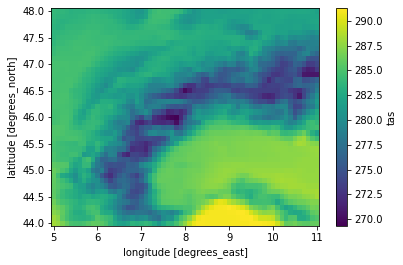

In [5]:
# c)

clima_SON = temp71_75_SON.mean("time")

clima_SON.plot()

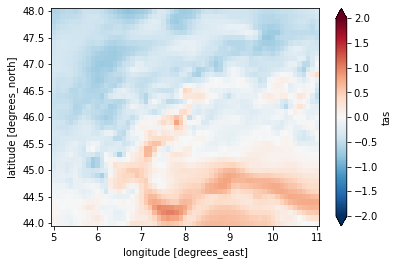

In [6]:
# d)

temp_SON73 = datos.tas.sel(time=slice('1973-09-01', '1973-11-30')).mean("time")

temp_SON73

anom = temp_SON73 - clima_SON

anom.plot(cmap='RdBu_r', vmin=-2.0, vmax=+2.0, extend='both')

# Task 3

Take a temperature file (e.g. tas.nc).

a) Convert the temperature from `degrees Kelvin` into `degrees Celsius` by subtracting -273.15 from the variable.

b) Correct the `unit` attribute of the modified file to degree Celsius.

c) Select the first time step of the modified file and verify the temperature using a quick plot. Are the automatic labelling in the colorbar in correct units, that is degree Celsius? Save only the first time step as a `.nc` file to the disk.

d) Convert temperature unit same as in a) for tas.nc but by using `xclim` 

e) Check the `unit` attribute in the file. Did `xclim` correct it automatically?

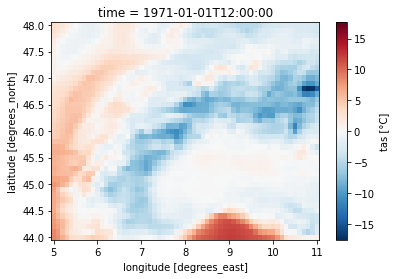

In [7]:
# a) 

t2m_C = datos.tas - 273.15

# b)

t2m_C.attrs['units'] = '°C'

t2m_C

# c)

t2m_0 = t2m_C.isel(time=0)

t2m_0.plot()


In [8]:
# d)
del t2m_C
t2m_C = xc.units.convert_units_to(datos.tas, '°C')

t2m_C.attrs["units"]

'°C'

# Task 4 

Compare the maximum summer temperature of 1972 and 1973 for all the grid points.

*Hint:* Select the two years first in seperate variables (`Tmax_1972`, `Tmax_1973`) and calculate the difference.

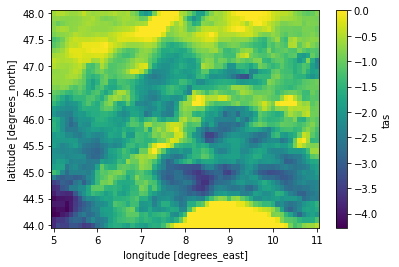

In [9]:
tmx_72 = datos.tas.sel(time=slice('1972')).max("time")
tmx_73 = datos.tas.sel(time=slice('1973')).max("time")

diff_tmx = tmx_72 - tmx_73

diff_tmx.plot()

# Task 5



 Calculate the 16th and 84th quantiles for the `precipitation rate`.


*Use a PR file in EUR-11N*




In [10]:
pr_file = '/lhome/cra2022/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/pr/reduced_pr_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc'

ds_pr = xr.open_dataset(pr_file)

ds_pr

pr_q16 = ds_pr.pr.quantile(q=0.16, dim='time')
pr_q84 = ds_pr.pr.quantile(q=0.84, dim='time')


In [11]:
del datos

# Advanced: Task 6

Calculate the `number of freezing days` (i.e. days with maximum temperature below 0°C ) for all the grid points for the file used in Task 3. Watch out for the units! 

a) Use `masking concept` to calculate it. The masked file will contain a binary field which is set to `True` if the temperature is below 0°C and to `False` everywhere else.
Then use `sum()` to add up the freezing days you have calculated over the whole period and have a quick look at the result with a quick plot. 

b) Use `xclim.indicators.icclim.ID()` to calculate. Check the results with both degree Celsius and degree Kelvin input file. Does `xclim` takes care of units automatically? 



Days with Tmax_C < 0 °C are 534196
Days with freeze_d_Tmax < 0 °C are 534196


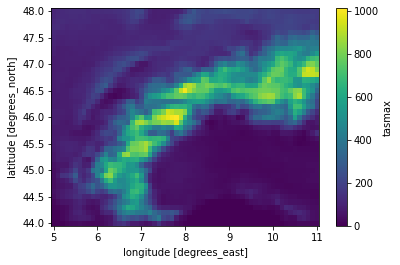

In [12]:
t_max = xr.open_dataset('/lhome/cra2022/l.quirino.2_2022/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tasmax/reduced_tasmax_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-19751231_LL.nc')

Tmax_C = xc.units.convert_units_to(t_max.tasmax, 'degC')

# a)

Tmax_C0 = Tmax_C < 0 
count = Tmax_C0.sum().values
print('Days with Tmax_C < 0 °C are {}'.format(count))

Tmax_C0.sum('time').plot()

# b) 

freeze_d_Tmax = xc.indices.tx_days_below(Tmax_C, '0 degC')
count2 = freeze_d_Tmax.sum().values

print('Days with freeze_d_Tmax < 0 °C are {}'.format(count2))


In [13]:
#del Tmax, t_max

# Advanced: Task 7

Compare the values of `Consecutive summer days (CSU)` and `Tropical Nights Index (TNI)` for a future temperature scenario with current temperatures. What could that imply for our energy consumption? Use `Tmax`  for CSU and `Tmin` for TNI 

`Note`: Since the reduced dataset, EUR-11N folder contains only years 1971-1975, use EUR-11 folder containing 1971-2000 for current file. Slice out 5 years of data from the current file (1996-2000) and domain of Switzerland, that is latitiude: 44-48 deg N and longitude: 5, 11 deg E. 

`current-file:` /lhome/cra2022/YOURHOME/climriskdata/EUR-11/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tasmax/tasmax_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-20001231_LL.nc

`future-file:` /lhome/cra2022/YOURHOME/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/rcp85/tasmax/reduced_tasmax_EUR-11_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_MPI-CSC-REMO2009_v1_day_20710101-20751231_LL.nc

In [16]:
current_file = '/lhome/cra2022/l.quirino.2_2022/climriskdata/EUR-11/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/historical/tasmin/tasmin_EUR-11_MPI-M-MPI-ESM-LR_historical_r1i1p1_MPI-CSC-REMO2009_v1_day_19710101-20001231_LL.nc'

future_file = '/lhome/cra2022/l.quirino.2_2022/climriskdata/EUR-11N/MPI-M-MPI-ESM-LR_MPI-CSC-REMO2009_v1/rcp85/tasmin/reduced_tasmin_EUR-11_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_MPI-CSC-REMO2009_v1_day_20710101-20751231_LL.nc'

In [17]:
ds_tas_current = xr.open_dataset(current_file).sel(time=slice('1996', '2000'),
                                                  lat=slice(44,48), lon=slice(5,11))

ds_tas_future = xr.open_dataset(future_file)

In [19]:
# convert tasmin to deg celsius

current_tas_degC = xc.units.convert_units_to(ds_tas_current.tasmin, 'degC')
future_tas_degC = xc.units.convert_units_to(ds_tas_future.tasmin, 'degC')

In [32]:
current_CSU = xc.indicators.icclim.CSU(current_tas_degC,)

future_CSU = xc.indicators.icclim.CSU(future_tas_degC,)

/usr/local/miniconda3/lib/python3.9/site-packages/xclim/core/cfchecks.py:39: UserWarning: Variable has a non-conforming cell_methods: Got `time: minimum`, which do not include the expected `time: maximum`
  _check_cell_methods(
/usr/local/miniconda3/lib/python3.9/site-packages/xclim/core/cfchecks.py:39: UserWarning: Variable has a non-conforming cell_methods: Got `time: minimum`, which do not include the expected `time: maximum`
  _check_cell_methods(


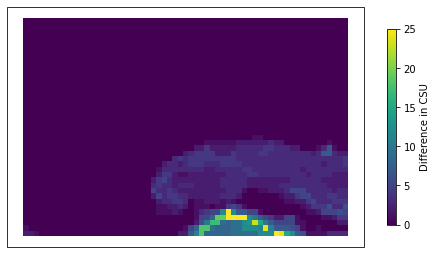

In [34]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())
(future_CSU.isel(time=0) - current_CSU.isel(time=0)).plot(ax=ax, transform=ccrs.PlateCarree(),
                                                          cbar_kwargs=dict(label='Difference in CSU',
                                                                          shrink=0.6)
                                                         )

In [21]:
current_TNI = xc.indicators.icclim.TR(current_tas_degC,)

In [30]:
future_TNI = xc.indicators.icclim.TR(future_tas_degC,)

/usr/local/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


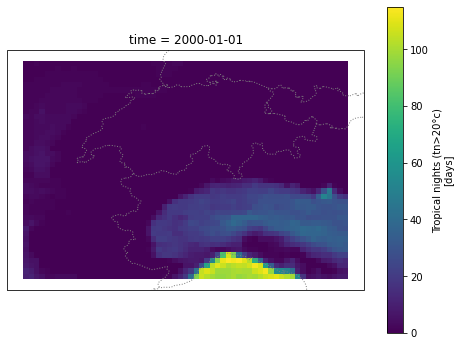

In [28]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())
current_TNI.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linestyle=':', color='grey')
ax.add_feature(cfeature.BORDERS, linestyle=':',  color='grey')
#ax.add_feature(cfeature.OCEAN, zorder=10)

/usr/local/miniconda3/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


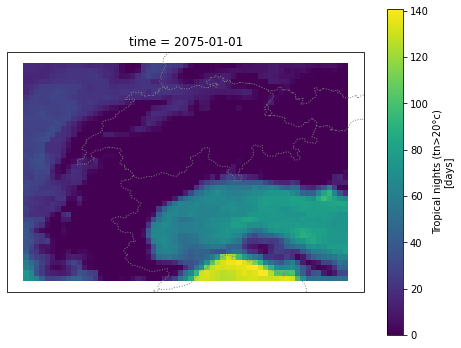

In [31]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())
future_TNI.isel(time=-1).plot(ax=ax, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linestyle=':', color='grey')
ax.add_feature(cfeature.BORDERS, linestyle=':',  color='grey')
#ax.add_feature(cfeature.OCEAN, zorder=10)